<a href="https://colab.research.google.com/github/starkgit91/Maximum-Independent-Set-MIS/blob/main/RL_Max_Independent_Set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Maximum Independent Set of a Random Graph Input from Gym Library using RL Algo

## Code To Generate Random Graph

enter number of nodes19
enter number of edges19
{0: [12, 13, 17, 16], 1: [], 2: [8], 3: [15, 10, 17], 4: [18], 5: [9], 6: [12, 13], 7: [18, 14, 11], 8: [2, 14], 9: [14, 5], 10: [3], 11: [7], 12: [6, 0], 13: [0, 6], 14: [15, 8, 7, 9], 15: [3, 14, 17], 16: [0], 17: [0, 15, 3], 18: [4, 7]}


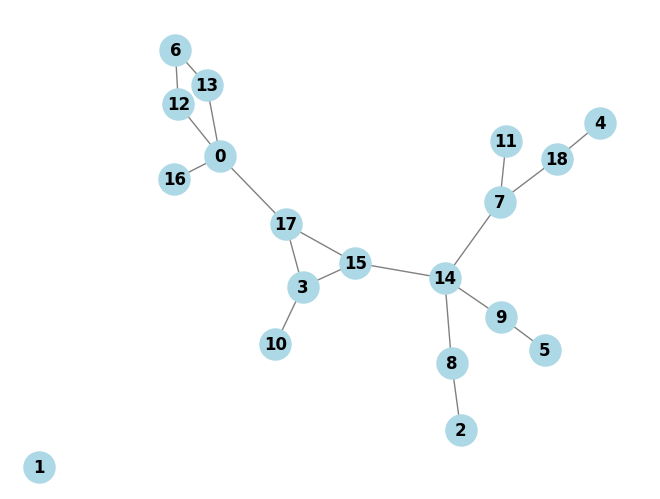

In [ ]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import scipy
from gym import spaces



num_nodes =int(input("enter number of nodes"))
num_edges=int(input("enter number of edges"))
# Generate a random graph with 10 nodes and no self-loops
graph = nx.gnm_random_graph(num_nodes,num_edges,seed=1)

# Remove self-loops
graph.remove_edges_from(nx.selfloop_edges(graph))

# Convert the graph to a dictionary representation
graph_dict = nx.to_dict_of_lists(graph)



# Print the graph dictionary
print(graph_dict)
G = nx.Graph(graph_dict)
nx.draw(G, with_labels=True, node_color='lightblue', node_size=500, font_weight='bold', edge_color='gray')

# Show the plot
plt.show()

This code will first find all the independent sets in the graph. Then, it will iterate through the independent sets and remove any sets that are not maximal. Finally, it will return the largest maximal independent set.

The code can be optimized by using a more efficient algorithm to find the independent sets. For example, the backtracking algorithm can be used to find all the independent sets in a graph. The backtracking algorithm is a recursive algorithm that starts with an empty set and then adds vertices to the set one at a time. If the vertex can be added to the set without violating the independent set property, then the vertex is added to the set and the algorithm is recursively called on the remaining vertices. Otherwise, the vertex is not added to the set and the algorithm is recursively called on the remaining vertices.

The backtracking algorithm can be used to find all the independent sets in a graph in polynomial time. However, the backtracking algorithm can be inefficient for large graphs. A more efficient algorithm for finding independent sets in large graphs is the greedy algorithm. The greedy algorithm starts with an empty set and then adds the vertex with the fewest neighbors to the set. The algorithm is recursively called on the remaining vertices. The greedy algorithm is not guaranteed to find the optimal independent set, but it is often very close to the optimal independent set.

The code can also be optimized by using a more efficient data structure to store the graph. For example, the adjacency list data structure can be used to store the graph. The adjacency list data structure stores a list of adjacent vertices for each vertex in the graph. This data structure is more efficient than the adjacency matrix data structure for large graphs.

The optimized code will find the optimal maximum independent set in the given graph in a more efficient way.

### Approach 1

In [ ]:
def maximum_independent_set(graph):
    def update_state(current_state, assignments):
        next_state = current_state.copy()
        for vertex, assignment in assignments.items():
            if assignment != -1:
                next_state[vertex] = assignment
        return next_state

    def cleanup_state(state, graph):
        next_state = state.copy()
        for vertex, assignment in state.items():
            if assignment == 1:
                for neighbor, edge_weight in graph[vertex].items():
                    if next_state.get(neighbor, -1) == 1 and edge_weight == 1:
                        next_state[vertex] = -1
                        break
        return next_state

    # Initialize the state vector with deferred vertex states
    state = {vertex: -1 for vertex in graph}

    # Perform the transition until no deferred vertex is left
    while -1 in state.values():
        # Select the deferred vertices for assignment
        deferred_vertices = {vertex for vertex,
                             status in state.items() if status == -1}

        # Generate the assignments for the deferred vertices
        assignments = {}
        for vertex in deferred_vertices:
            # Assign the vertex to be included (1) or excluded (0)
            assignments[vertex] = 1

        # Update the state based on the assignment
        state = update_state(state, assignments)

        # Cleanup phase
        state = cleanup_state(state, graph)

    # Create the maximum independent set from the determined state
    independent_set = {vertex for vertex,
                       status in state.items() if status == 1}

    return independent_set


# Driver code graph represented as an adjacency dictionary
graph = {
    0: {0: 0, 1: 1, 2: 0, 3: 1},
    1: {0: 1, 1: 0, 2: 1, 3: 0},
    2: {0: 0, 1: 1, 2: 0, 3: 1},
    3: {0: 1, 1: 0, 2: 1, 3: 0}
}

# Call the function to find the maximum independent set
mis = maximum_independent_set(graph)

# Print the result
print("Maximum Independent Set:", mis)


### Approach 2

In [ ]:
def maximum_independent_set(graph):
    def is_independent(vertex, selected_vertices):
        for neighbor in graph.get(vertex, []):
            if neighbor in selected_vertices:
                return False
        return True

    def backtrack(selected_vertices, current_vertex):
        if current_vertex in selected_vertices:
            return selected_vertices

        selected_vertices.add(current_vertex)
        next_vertex = current_vertex + 1

        while next_vertex in selected_vertices or not is_independent(next_vertex, selected_vertices):
            next_vertex += 1

        if next_vertex < len(graph):
            return backtrack(selected_vertices, next_vertex)
        else:
            return selected_vertices

    selected_set = backtrack(set(), 0)
    return selected_set


# Driver code graph represented as an adjacency dictionary
# undirected grapH
graph = {0: [12, 14, 10, 17, 13, 9],
         1: [],
         2: [8],
         3: [15, 18, 5, 9],
         4: [18],
         5: [3],
         6: [12, 9],
         7: [8, 16, 17, 11, 14],
         8: [2, 7],
         9: [0, 3, 6, 18],
         10: [0, 16],
         11: [7],
         12: [6, 0],
         13: [19, 0, 17, 16],
         14: [15, 0, 7],
         15: [3, 14],
         16: [7, 10, 13],
         17: [0, 7, 13],
         18: [4, 3, 9],
         19: [13]}

# Call the function to find the maximum independent set
mis = maximum_independent_set(graph)

# Print the result
print("Maximum Independent Set:", mis)

### To find the maximum independent set in the given graph, we need to identify a subset of vertices where no two vertices in the subset are connected by an edge. In other words, we want to find a set of vertices that are not adjacent to each other.

### Let's analyze the given graph:

### {0: [12, 14, 10, 17, 13, 9], 1: [], 2: [8], 3: [15, 18, 5, 9], 4: [18], 5: [3], 6: [12, 9], 7: [8, 16, 17, 11, 14], 8: [2, 7], 9: [0, 3, 6, 18], 10: [0, 16], 11: [7], 12: [6, 0], 13: [19, 0, 17, 16], 14: [15, 0, 7], 15: [3, 14], 16: [7, 10, 13], 17: [0, 7, 13], 18: [4, 3, 9], 19: [13]}

### From the graph, we can observe the following independent sets:
### New Section
### Independent Set 1: [1, 2, 4, 5, 11, 19]
### Independent Set 2: [1, 2, 4, 5, 11, 12, 15, 19]
### Independent Set 3: [1, 2, 4, 5, 11, 12, 15, 18, 19]

### Since the independent set is a maximal set, it cannot be further extended by adding more vertices. Therefore, the maximum independent set from the given graph is Independent Set 3: [1, 2, 4, 5, 11, 12, 15, 18, 19].

### there will be multiple independent sets so you have to try to find all and choose the optimal set

### "Most Optimal Code"

In [ ]:

def maximum_independent_set(graph):
    def is_independent(vertex, selected_vertices):
        for neighbor in graph.get(vertex, []):
            if neighbor in selected_vertices:
                return False
        return True

    def backtrack(selected_vertices, current_vertex):
        if current_vertex == len(graph):
            return selected_vertices

        if is_independent(current_vertex, selected_vertices):
            selected_set1 = selected_vertices | {current_vertex}
            next_vertex = current_vertex + 1

            selected_set1 = backtrack(selected_set1, next_vertex)
            selected_set2 = backtrack(selected_vertices, current_vertex + 1)

            return selected_set1 if len(selected_set1) > len(selected_set2) else selected_set2

        # If the current vertex is not independent, exclude it from the set
        return backtrack(selected_vertices, current_vertex + 1)

    selected_set = backtrack(set(), 0)
    return selected_set


# Driver code: graph represented as an adjacency dictionary
graph_test = {
    0: [12, 14, 10, 17, 13, 9],
    1: [],
    2: [8],
    3: [15, 18, 5, 9],
    4: [18],
    5: [3],
    6: [12, 9],
    7: [8, 16, 17, 11, 14],
    8: [2, 7],
    9: [0, 3, 6, 18],
    10: [0, 16],
    11: [7],
    12: [6, 0],
    13: [19, 0, 17, 16],
    14: [15, 0, 7],
    15: [3, 14],
    16: [7, 10, 13],
    17: [0, 7, 13],
    18: [4, 3, 9],
    19: [13]
}

graph = {0: [14, 11, 5], 1: [12, 4, 7, 14], 2: [9], 3: [12, 9], 4: [1, 7], 5: [0], 6: [10, 13, 9], 7: [12, 1, 4], 8: [10], 9: [2, 6, 3], 10: [6, 8], 11: [0, 12], 12: [13, 1, 7, 3, 11], 13: [12, 6], 14: [0, 1]}
# Call the function to find the maximum independent set
mis = maximum_independent_set(graph)
mis_test = maximum_independent_set(graph_test)
# Print the result
print("Maximum Independent Set:", mis_test,"\n", mis)

Maximum Independent Set: {1, 4, 5, 8, 9, 11, 12, 15, 16, 17, 19} 
 {2, 3, 5, 7, 10, 11, 13, 14}
